In [189]:
import random 
import numpy as np

def my_model(x:float):

    return x*2 + 5

# Minha base de dados
x_data = np.linspace(-5, 5, 20)
y_true = np.array([1 if p < 0 else -1 for p in x_data])

learning_rate = 0.01  # Taxa de aprendizado: pequena e positiva

# Inicializando os parâmetros do modelo que queremos aprender: y_pred = w1*x + w0
w1 = np.random.rand() * 0.1 # Peso angular (slope)
w0 = np.random.rand() * 0.1 # Bias (intecapto)

def relu(x):
    return np.maximum(0, x)

print("Iteração | Loss Médio |   w1    |   w0   ")
print("---------------------------------------------")


for i in range(200):

    # 1. Calcular as predições (scores) do modelo atual 
        # para cada x_i em x_data, y_pred = w1 * x_i + w0
    
    y_pred_score = w1 * x_data + w0


    # 2. Calcular a margem e a Hinge Loss
        # A margem é - y_true_i * y_pred_i
        # A Hinge Loss é max(0, margem)
    margin = 1 - y_true * y_pred_score
    loss_per_point = relu(margin) # Hinge loss para cada ponto de dado
    mean_loss = np.mean(loss_per_point) # Loss médio para esta época
    
    # Imprimir o progresso
    #if i % 20 == 0 or i == 199: # Imprime a cada 20 iterações e na última
    print(f"{i:8d} | {mean_loss:10.6f} | {w1:7.4f} | {w0:7.4f}")

    
    # 3. Calcular os gradientes da Hinge Loss em relação a w1 e w0
    #    O gradiente de L_i (loss do ponto i) em relação a y_pred_i é:
    #    -y_true_i  se margin_i > 0 (ou seja, loss_i > 0)
    #     0         se margin_i <= 0
    grad_L_ypred = np.where(margin > 0, -y_true, 0)

    #    Agora, usamos a regra da cadeia:
    #    dL/dw1 = (dL/dy_pred) * (dy_pred/dw1)
    #    dL/dw0 = (dL/dy_pred) * (dy_pred/dw0)
    #
    #    Como y_pred_i = w1 * x_data_i + w0:
    #    dy_pred_i / dw1 = x_data_i
    #    dy_pred_i / dw0 = 1
    #
    #    Calculamos a média dos gradientes sobre todos os pontos (Batch Gradient Descent)
    grad_w1 = np.mean(grad_L_ypred * x_data)
    grad_w0 = np.mean(grad_L_ypred * 1) # ou np.mean(grad_L_ypred)

    # 4. Atualizar os pesos usando Gradiente Descendente
    #    novo_peso = peso_antigo - taxa_de_aprendizado * gradiente
    w1 -= learning_rate * grad_w1
    w0 -= learning_rate * grad_w0
    break

print("---------------------------------------------")
if i < 199 and mean_loss != 0.0: # Se não imprimiu a última iteração no loop
    print(f"{i:8d} | {mean_loss:10.6f} | {w1:7.4f} | {w0:7.4f}")
print(f"Final    | {np.mean(relu(1 - y_true * (w1 * x_data + w0))):10.6f} | {w1:7.4f} | {w0:7.4f}")


Iteração | Loss Médio |   w1    |   w0   
---------------------------------------------
       0 |   1.124563 |  0.0473 |  0.0570
---------------------------------------------
       0 |   1.124563 |  0.0210 |  0.0570
Final    |   1.055311 |  0.0210 |  0.0570


In [198]:
np.mean(y_pred_score - y_true)

np.float64(0.057034212035229924)

In [203]:
2**8

256

In [200]:
y_pred_score

array([-0.17963509, -0.15472253, -0.12980997, -0.10489742, -0.07998486,
       -0.0550723 , -0.03015974, -0.00524718,  0.01966537,  0.04457793,
        0.06949049,  0.09440305,  0.11931561,  0.14422817,  0.16914072,
        0.19405328,  0.21896584,  0.2438784 ,  0.26879096,  0.29370351])

In [193]:
grad_L_ypred, x_data

(array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1]),
 array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
        -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
         0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
         2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ]))

In [190]:
np.mean(grad_L_ypred * x_data)

np.float64(2.631578947368421)

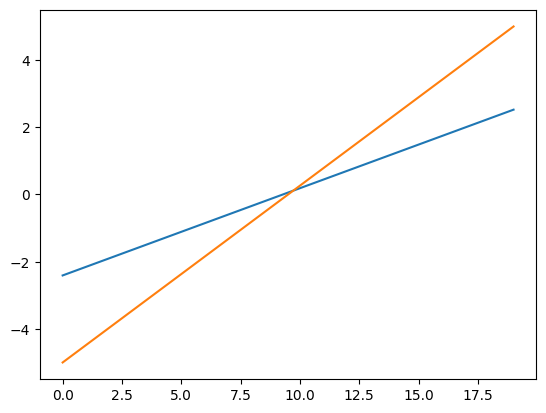

In [184]:
import matplotlib.pyplot as plt


plt.plot([w for w in reversed(y_pred_score)])
plt.plot(x_data)

In [182]:
x_data

array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
       -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
        0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
        2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ])

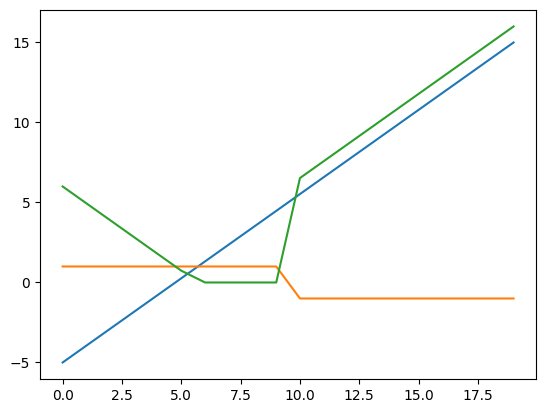

In [169]:
import matplotlib.pyplot as plt

plt.plot(y_pred)
plt.plot(y_true)
plt.plot(loss)


In [120]:
loss #* learning_rate

weights = [w*learning_rate for w in weights]
x_data_to_pred = [xd + w for xd, w in zip(x_data, weights)]
y_pred_new = [my_model(x) for x in x_data_to_pred]

loss_new = np.array([yt - yp for yt, yp in zip(y_true, y_pred_new)])

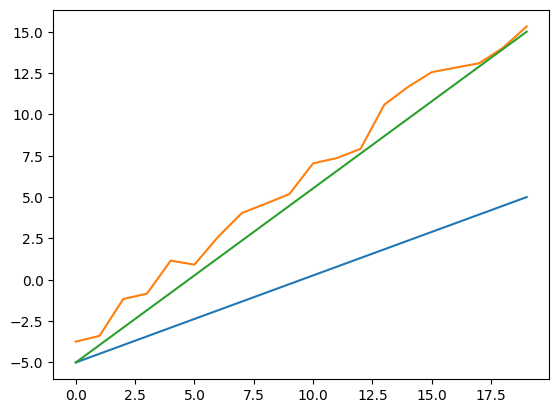

In [117]:
import matplotlib.pyplot as plt


plt.plot(x_data)
# plt.plot(x_data_to_pred)
# plt.plot(weights)
plt.plot(y_pred)
plt.plot(y_pred_new)

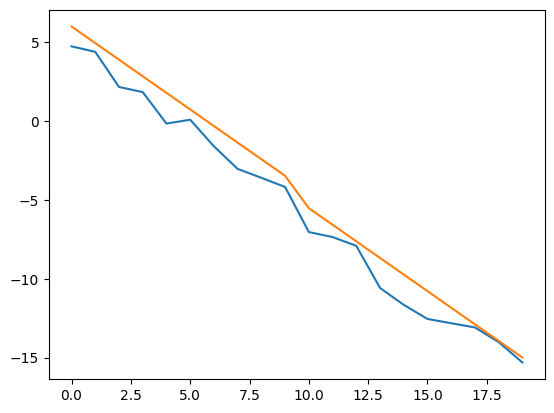

In [122]:
plt.plot(loss)
plt.plot(loss_new)

In [67]:
weights

array([0.85942317, 0.9915576 , 0.15940099, 0.42379421, 0.58910049,
       0.2743777 , 0.96884964, 0.20663698, 0.61567693, 0.12942375,
       0.66391478, 0.37264482, 0.13177608, 0.04413279, 0.38709918,
       0.6224784 , 0.00686838, 0.79349095, 0.41712593, 0.26099826])

In [58]:
weights

array([0.27218036, 0.11673824, 0.25705767, 0.00136839, 0.9619839 ,
       0.52772237, 0.09034636, 0.26324863, 0.61666755, 0.54273073,
       0.30944654, 0.18371704, 0.48988919, 0.10375987, 0.39211774,
       0.58010788, 0.5197921 , 0.3882133 , 0.80395222, 0.55649892])